<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/Week5_DEM_HIllshade_Contours_Shapefiles_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEM, Hillshade, Contour, Shapefile, plots

In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


In [2]:
%pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others
#%pip install gdal
#%pip install elevation

     |████████████████████████████████| 1.4MB 4.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.3MB 200kB/s 
     |████████████████████████████████| 972kB 37.2MB/s 
     |████████████████████████████████| 14.8MB 351kB/s 
     |████████████████████████████████| 6.5MB 34.4MB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=5e47886cec8b8334c220ae55bd226ecdf982d34a681db313c7490b62d8188b01
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy
     |████████████████████████████████| 71kB 3.1MB/s 
ERROR: pip-tools 4.5.1 has requirement click>=7, but you'll have click 6.7 which is incompatible.
  Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


In [99]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
#import rasterio.features
#import rasterio.warp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from rasterio.plot import plotting_extent
#import seaborn as sns
from osgeo import gdal
#import elevation 
import geopandas as gpd
import os


In [4]:
%pwd

'/content'

In [7]:
#%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles

/content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles


In [9]:
%ls *.shp #verify the files

Cabeus_Clipping.shp
Crashed_Spacecraft_LCROSS_Centaur.shp
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp
Crashed_Spacecraft_LCROSS.shp
PSRs_Cabeus_clp.shp
SPole_Crater_Names.shp
Spole_DEM1000m_Contours_clp.shp
USGS_LinearFeatures_Cabeus.shp


In [30]:
#gpd.read_file('filename.shp')
Cabeus_Clipping=gpd.read_file('Cabeus_Clipping.shp')
Crashed_Spacecraft_LCROSS_Centaur=gpd.read_file('Crashed_Spacecraft_LCROSS_Centaur.shp')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15=gpd.read_file('Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp')
Crashed_Spacecraft_LCROSS=gpd.read_file('Crashed_Spacecraft_LCROSS.shp')
PSRs_Cabeus_clp=gpd.read_file('PSRs_Cabeus_clp.shp')
SPole_Crater_Namesp=gpd.read_file('SPole_Crater_Names.shp')
Spole_DEM1000m_Contours_clp=gpd.read_file('Spole_DEM1000m_Contours_clp.shp')
USGS_LinearFeatures_Cabeus=gpd.read_file('USGS_LinearFeatures_Cabeus.shp')
#USGS_LinearFeatures_Cabeus.info()

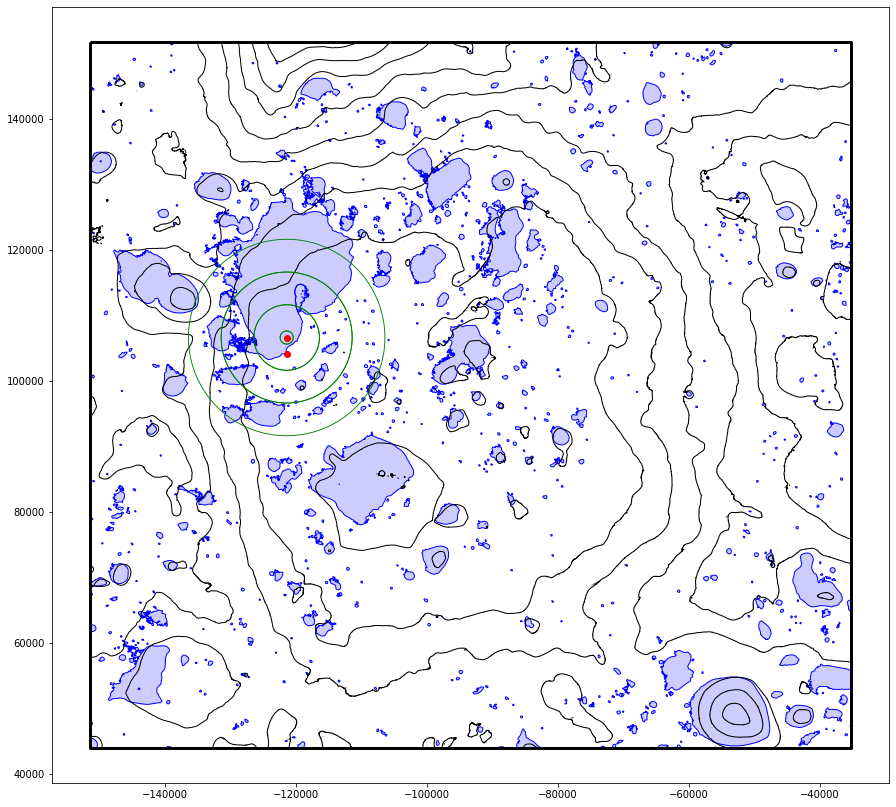

In [35]:
# Plotting the shapefiles
fig, ax = plt.subplots(figsize=[15,15])
Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1) #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2)
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1)
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='g', linewidth=0.9)
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r' )
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
plt.show()

In [16]:
PSRs_Cabeus_clp.crs

<Projected CRS: PROJCS["Moon2000_sp",GEOGCS["GCS_Moon_2000",DATUM[ ...>
Name: Moon2000_sp
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Polar Stereographic (variant B)
Datum: Moon_2000
- Ellipsoid: Moon_2000_IAU_IAG
- Prime Meridian: Reference_Meridian

In [106]:
PSRs_Cabeus_clp.head()

,OBJECTID,Id,gridcode,Area,InPoly_FID,SmoPgnFlag,Shape_Leng,Shape_Area,geometry
0,1,63,20000,67882,6,0,1112.600016,95143.607748,"POLYGON ((-138958.763 151303.042, -138977.665 ..."
1,2,92,20000,99311,9,0,1397.102858,101129.106341,"POLYGON ((-64729.461 151171.921, -64733.386 15..."
2,3,106,20000,731205,12,0,3818.120992,700058.408368,"POLYGON ((-54317.523 151122.592, -54348.965 15..."
3,4,174,20000,439138,22,0,2542.070558,492068.597937,"POLYGON ((-65207.264 150770.896, -65225.432 15..."
4,5,202,20000,36421,25,0,915.489731,45940.205497,"POLYGON ((-78598.409 150582.191, -78613.928 15..."


In [41]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data/
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data
 AVGVISIB_85S_060M_201608_clp_rs10m.tfw
 AVGVISIB_85S_060M_201608_clp_rs10m.tif
 dp_archsis.pdf
'dp_sis (1).pdf'
 polar_south_80_summer_max_sp240m_clp_rs10m1.tfw
 polar_south_80_summer_max_sp240m_clp_rs10m1.tif
 polar_south_80_summer_max.txt
 polar_south_80_sw_max_diff.png
 polar_south_80_sw_max_diff.txt
 polar_south_80_winter_min.png
 polar_south_80_winter_min.txt
 Shapefiles/
 spoledem10m_clp20m.tfw
 spoledem10m_clp20m.tif
 spoledem10m_clp.tfw
 spoledem10m_clp.tif


In [108]:
with rio.open('spoledem10m_clp20m.tif') as spDEM: #open the geotif file with RasterIO
      spDEM_np= spDEM.read(1)
      spDEM_plot_extent = plotting_extent(spDEM)


In [109]:
spDEM_plot_extent #It defines the coordinates as a tuple in the appropriate order for matplotlib as:(leftmost coordinate, rightmost coordinate, bottom coordinate, top coordinate)

(-151500.0, -35300.0, 44000.0, 151680.0)

In [102]:
spDEM.crs

CRS.from_wkt('PROJCS["Moon2000_sp",GEOGCS["GCS_Moon_2000",DATUM["D_Moon_2000",SPHEROID["Moon_2000_IAU_IAG",1737400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-90],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [120]:
spDEM_np #numpy array 
df_spDEM = pd.DataFrame(data=spDEM_np) #Numpy array to Pandas dataframe
df_spDEM.iloc[0:5, 0:10] #look at a corner of the data array

,0,1,2,3,4,5,6,7,8,9
0,-656,-657,-658,-660,-661,-661,-663,-664,-665,-665
1,-656,-657,-658,-659,-660,-661,-662,-663,-664,-665
2,-656,-657,-658,-659,-660,-661,-662,-663,-663,-665
3,-656,-657,-657,-658,-660,-661,-662,-662,-663,-664
4,-657,-657,-658,-659,-660,-661,-661,-662,-663,-664


In [132]:
# Plot the DEM and hillshade at the same time
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM, azimuth=-30, altitude=30)

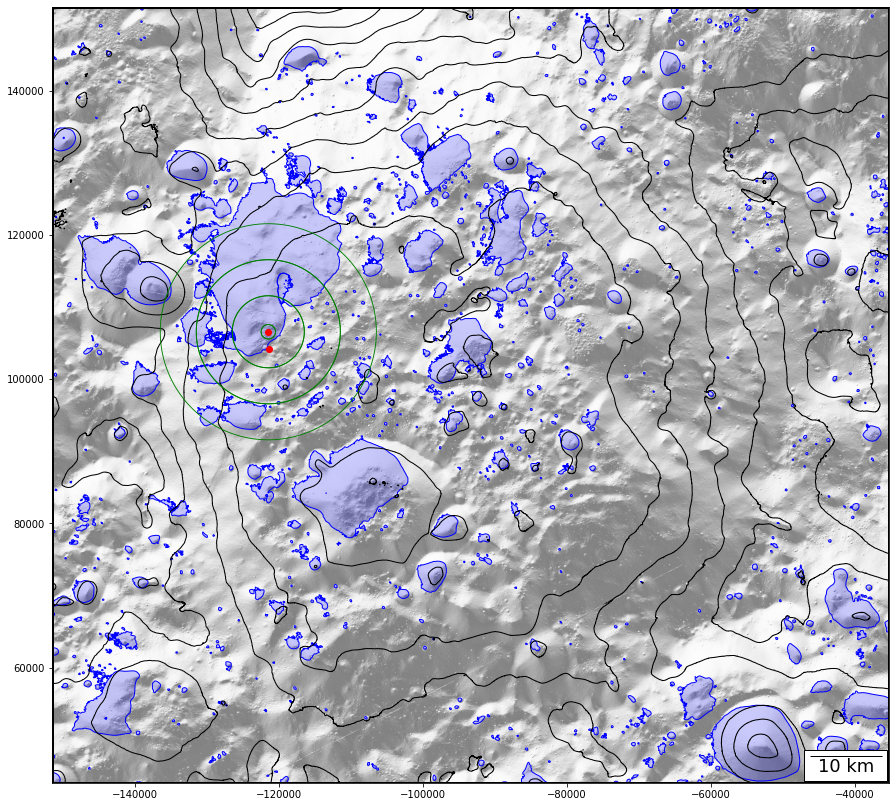

In [133]:
#Contour code and scale bar. Overlay of shapefiles
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar #need those for scalebar
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(size=18)

fig, ax = plt.subplots(figsize=(15, 15))
"""
ep.plot_bands(
    df_spDEM,
    ax=ax,
    cmap="gist_earth",
    title="DTM Without Hillshade",
    extent=spDEM_plot_extent   
)
"""
Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1) #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2)
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1)
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='g', linewidth=0.9)
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r' )
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "gray") 

#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spDEM_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.add_artist(scalebar)

plt.show()

#Extra Stuff

In [107]:
#to project a shapefile to the CRS of the raster
#PSRs_Cabeus_clp_spDEMcrs=PSRs_Cabeus_clp.to_crs(spDEM.crs)
#PSRs_Cabeus_clp_spDEMcrs.head()

,OBJECTID,Id,gridcode,Area,InPoly_FID,SmoPgnFlag,Shape_Leng,Shape_Area,geometry
0,1,63,20000,67882,6,0,1112.600016,95143.607748,"POLYGON ((-138958.763 151303.042, -138977.665 ..."
1,2,92,20000,99311,9,0,1397.102858,101129.106341,"POLYGON ((-64729.461 151171.921, -64733.386 15..."
2,3,106,20000,731205,12,0,3818.120992,700058.408368,"POLYGON ((-54317.523 151122.592, -54348.965 15..."
3,4,174,20000,439138,22,0,2542.070558,492068.597937,"POLYGON ((-65207.264 150770.896, -65225.432 15..."
4,5,202,20000,36421,25,0,915.489731,45940.205497,"POLYGON ((-78598.409 150582.191, -78613.928 15..."
